In [1]:
mapsize=(128,128)

In [2]:
def gray(x):
    return (x ^ (x>>1))

In [3]:
x_sign = []
y_sign = []
xd_sign = []
yd_sign = []
s_id = [0,0]
s_xo = [64+32,32]
s_yo = [64+32,32]
s_xd = [0,0]
s_yd = [0,0]
s_mv = [2+1,0]
s = s_id + s_xo + s_yo + s_xd + s_yd + s_mv
print(s)
for x in range(mapsize[0]):
    for y in range(mapsize[0]):
        if (gray(x)&s[2])^s[3]==0:
            if (gray(y)&s[4])^s[5]==0:
                x_sign.append(x)
                y_sign.append(y)
        if (gray(x)&s[6])^s[7]==0:
            if (gray(y)&s[8])^s[9]==0:
                xd_sign.append(x)
                yd_sign.append(y)

[0, 0, 96, 32, 96, 32, 0, 0, 0, 0, 3, 0]


In [4]:
moves = [(-1,1),(0,1),(1,1),(1,0),(1,-1),(0,-1),(-1,-1),(-1,0)]
xm_sign = []
ym_sign = []
for mi in range(8):
    if (gray(mi)&s[10])^s[11]==0:
        xm_sign.append(moves[mi][0])
        ym_sign.append(moves[mi][1])

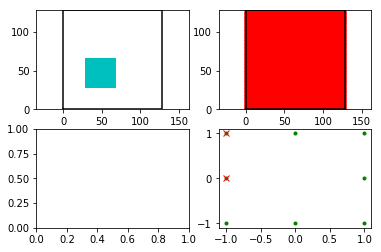

In [5]:
import matplotlib.pyplot as plt
%matplotlib inline

fig = plt.figure()
ax1 = fig.add_subplot(2,2,3)
ax2 = fig.add_subplot(2,2,1)
ax2.plot(x_sign,y_sign,'cs',
         [0,0,mapsize[0],mapsize[0],0],[0,mapsize[0],mapsize[0],0,0],'k-')
ax2.axis('equal')
ax2.set_xlim(0,mapsize[0])
ax2.set_ylim(0,mapsize[1])
ax3 = fig.add_subplot(2,2,2)
ax3.plot(xd_sign,yd_sign,'r.',
         [0,0,mapsize[0],mapsize[0],0],[0,mapsize[0],mapsize[0],0,0],'k-')
ax3.axis('equal')
ax3.set_xlim(0,mapsize[0])
ax3.set_ylim(0,mapsize[1])
ax4 = fig.add_subplot(2,2,4)
ax4.plot([m[0] for m in moves],[m[1] for m in moves],'g.',
         xm_sign,ym_sign,'rx')
plt.show()

In [6]:
import csv
with open('test_signs.csv', 'w', newline='') as signfile:
    csvwriter = csv.writer(signfile)
    csvwriter.writerow(['S']+s)
!cat test_signs.csv

In [7]:
!../bin/simtest res.csv test_signs.csv

163 agents initialized
Logging results to res.csv
Read 1 signs
World is 128x128
500 steps simulated
468 trips completed overall


In [8]:
resdata = []
maxstep = 0

with open('res.csv', 'r') as csvfile:
    resreader = csv.reader(csvfile, delimiter=',')
    for row in resreader:
        resdata.append([int(v) for v in row])
        maxstep = int(row[0])
resdata = resdata[1:]

print(maxstep)

500


In [9]:
import numpy

num_agents = max([row[1] for row in resdata])
print(num_agents)

x_curr=numpy.transpose([[row[2] for row in resdata if row[1]==ii] for ii in range(num_agents)])
y_curr=numpy.transpose([[row[3] for row in resdata if row[1]==ii] for ii in range(num_agents)])
x_goal=numpy.transpose([[row[4] for row in resdata if row[1]==ii] for ii in range(num_agents)])
y_goal=numpy.transpose([[row[5] for row in resdata if row[1]==ii] for ii in range(num_agents)])

all_goals = set([(row[4],row[5]) for row in resdata])
x_all_goals = [g[0] for g in all_goals]
y_all_goals = [g[1] for g in all_goals]


162


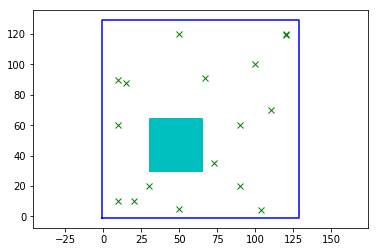

In [10]:
import matplotlib.animation as animation

fig = plt.figure()
ax = fig.add_subplot(1,1,1)

ax.set_xlim((-1,1+mapsize[0]))
ax.set_ylim((-1,1+mapsize[1]))
ax.axis('equal')

ax.plot([-1, 1+mapsize[0], 1+mapsize[0], -1, -1],[-1, -1, 1+mapsize[1], 1+mapsize[1], -1],'b-')
ax.plot(x_sign,y_sign,'cs')
ax.plot(x_all_goals,y_all_goals,'gx')

tails, = ax.plot([],[],'c.',markersize=2)
dots, = ax.plot([],[],'k.',markersize=4)

def init():
    dots.set_data([],[])
    tails.set_data([],[])
    return(dots,tails,)

def animate(ii):
    dots.set_data(x_curr[ii],y_curr[ii])
    tails.set_data(numpy.transpose(x_curr[ii-4:ii+1]),
                   numpy.transpose(y_curr[ii-4:ii+1]))
    return(dots,tails,)
    
ani = animation.FuncAnimation(fig, animate, init_func=init, frames=maxstep, interval=50, blit=True)

In [11]:
from IPython.display import HTML
HTML(ani.to_jshtml())